## 라이브러리 import

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

## 데이터 로드

In [43]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 확인

In [44]:
labels = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

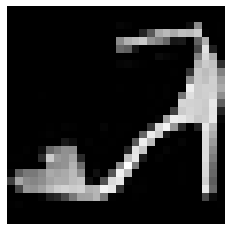

sandal
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6   3   0   0
    0   0   0   0   0  14 138   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  36
   89 170 186 170 191 186 203   3   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 139 176 188 201
  147 130 103  22  25   0  97 177   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 104  94  22   0
    0   0   0   0   0   0  69 225  32   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  11   6   3   0   0 130 216 173   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5   7   3   1
    0   0   0   0   0   0 176 203 194  46]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [45]:
# 임의의 데이터 확인
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.axis('off')
plt.show()
print(labels[Y_train[my_sample]])
print(X_train[my_sample])

## 데이터 전처리

### one-hot encoding

In [46]:
# np_utils.to_categorical()을 사용해 one-hot encoding
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### reshape, scaling

In [47]:
# 모델에 적용하기 위해 차원 축소
# 나중에 그림 확인하기 위해 원본 데이터 보존
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)
# minmax scaling
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## 모델 생성

In [48]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 63,018
Trainable params: 63,018
Non-trainable params: 0
_________________________________________________________________
None


## 모델 학습

In [49]:
fit_hist = model.fit(x_train, y_train, batch_size=16, epochs=7, verbose=1, validation_split=0.2)

Epoch 1/7
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5215 - accuracy: 0.8139 - val_loss: 0.4190 - val_accuracy: 0.8457
Epoch 2/7
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3854 - accuracy: 0.8574 - val_loss: 0.3673 - val_accuracy: 0.8676
Epoch 3/7
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3489 - accuracy: 0.8716 - val_loss: 0.3480 - val_accuracy: 0.8736
Epoch 4/7
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3260 - accuracy: 0.8794 - val_loss: 0.3601 - val_accuracy: 0.8689
Epoch 5/7
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3077 - accuracy: 0.8846 - val_loss: 0.3411 - val_accuracy: 0.8777
Epoch 6/7
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2921 - accuracy: 0.8921 - val_loss: 0.3579 - val_accuracy: 0.8729
Epoch 7/7
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2820 - accuracy: 0.8942 - val_loss: 0.3302 - val_accuracy: 0.8827

## 학습 결과 확인

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.8726000189781189


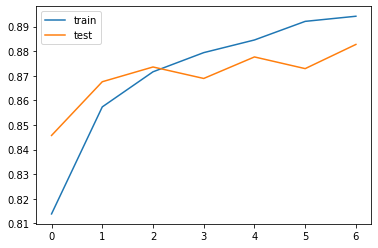

In [51]:
# train, test accuracy 확인
plt.plot(fit_hist.history['accuracy'], label='train')
plt.plot(fit_hist.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.show()

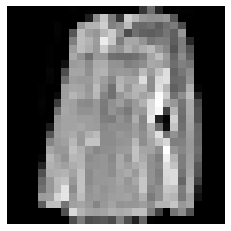

[[0.3834905  0.0056795  0.01896292 0.02984565 0.0277536  0.00625057
  0.22986548 0.00070496 0.29424128 0.00320555]]
6
Target: shirt
Prediction after learning: Tshirt


In [57]:
# 임의의 행 추출해 모델 확인
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
plt.axis('off')
plt.show()
sample = x_test[my_sample]
sample = sample.reshape(1, -1) # 모델에 테스트하기 위해 2차원으로 바꿔줌
pred = model.predict(sample)
print(pred)
print(Y_test[my_sample])
print('Target:', labels[Y_test[my_sample]])
print('Prediction after learning:', labels[np.argmax(pred)])